In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
data = pd.read_csv("runtime_data.csv")
data.head()

,approach,num_threads,runtime1,runtime2,runtime3,mean_runtime
0,omp_reduction,2,3.414,3.387,3.412,3.404333
1,omp_reduction,4,1.960,1.920,1.922,1.934000
2,omp_reduction,6,2.056,2.032,2.059,2.049000
3,omp_reduction,8,1.954,1.906,1.982,1.947333
4,critical_zone,2,67.186,56.189,63.605,62.326667


In [48]:
omp_reduction = data.loc[data["approach"] == "omp_reduction"]["mean_runtime"]
critical_zone = data.loc[data["approach"] == "critical_zone"]["mean_runtime"]
helper_array = data.loc[data["approach"] == "helper_array"]["mean_runtime"]

num_threads = [2, 4, 6, 8]

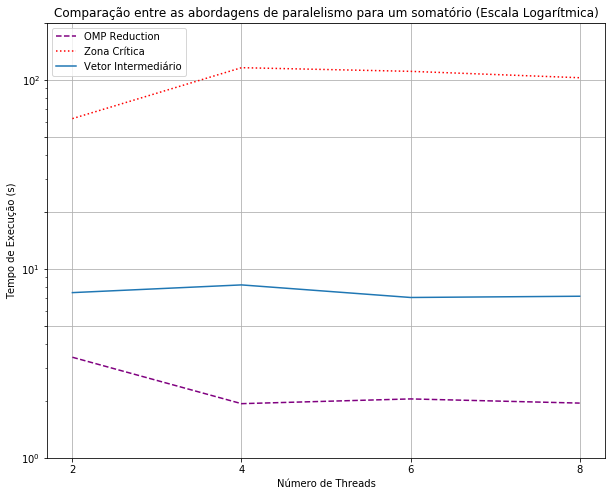

In [89]:
plt.figure(figsize=(10,8))
plt.plot(num_threads, omp_reduction, ls='--', color='purple')
plt.plot(num_threads, critical_zone, ls='dotted', color='red')
plt.plot(num_threads, helper_array)
plt.yscale("log")
plt.title("Comparação entre as abordagens de paralelismo para um somatório (Escala Logarítmica)")
plt.ylabel("Tempo de Execução (s)")
plt.xlabel("Número de Threads")
plt.yticks([1, 5, 10, 20, 50, 100, 200])
plt.xticks([2, 4, 6, 8])
plt.legend(["OMP Reduction", "Zona Crítica", "Vetor Intermediário"])
plt.savefig('comparison_log.png')
plt.grid()
plt.show()

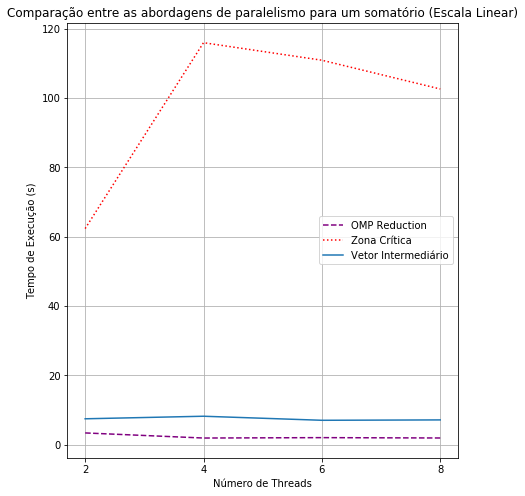

In [90]:
plt.close()
plt.figure(figsize=(7,8))
plt.plot(num_threads, omp_reduction, ls='--', color='purple')
plt.plot(num_threads, critical_zone, ls='dotted', color='red')
plt.plot(num_threads, helper_array)
plt.yscale("linear")
plt.title("Comparação entre as abordagens de paralelismo para um somatório (Escala Linear)")
plt.ylabel("Tempo de Execução (s)")
plt.xlabel("Número de Threads")
plt.xticks([2, 4, 6, 8])
plt.legend(["OMP Reduction", "Zona Crítica", "Vetor Intermediário"])
plt.savefig('comparison_linear.png')
plt.grid()
plt.show()